In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models


/Users/mdmahfuzurrahman/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
input_folder = "Agricultural-crops"
output_folder = "ImageRecgnition"

split_ratio  = (0.8, 0.1, 0.1)

splitfolders.ratio(
    input_folder,
    output= output_folder,
    seed=42,
    ratio=split_ratio,
    group_prefix=None
)

In [3]:
image_size = (224,224)
batch_size = 32

train_datagt= ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range =20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [4]:
test_datagt = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagt= ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
import os

In [6]:
train_direc = os.path.join(output_folder,'train')
valid_direc = os.path.join(output_folder,'val')
test_direc = os.path.join(output_folder,'test')


train_data = train_datagt.flow_from_directory(
    train_direc,
    target_size = image_size,
    batch_size= batch_size,
    class_mode = 'categorical'
    
)

test_data = test_datagt.flow_from_directory(
    test_direc,
    target_size = image_size,
    batch_size= batch_size,
    class_mode = 'categorical'
    
)

valid_data = valid_datagt.flow_from_directory(
    valid_direc,
    target_size = image_size,
    batch_size= batch_size,
    class_mode = 'categorical'
    
)


Found 652 images belonging to 30 classes.
Found 105 images belonging to 30 classes.
Found 72 images belonging to 30 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..149.061].


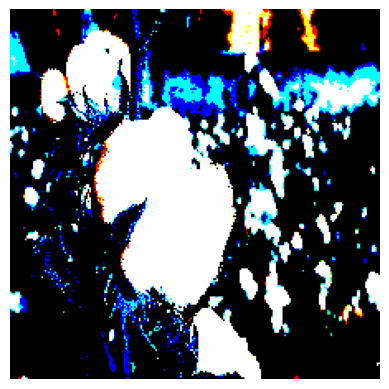

In [10]:
import random
from PIL import Image

images, labels = next(valid_data)
idx = random.randint(0, images.shape[0] - 1)

plt.imshow(images[idx])
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [13]:
from keras.applications.resnet import ResNet50
base_model = ResNet50(weights= 'imagenet', include_top = False, input_shape=(image_size[0],image_size[1],3))

base_model.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [14]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(30, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:

model.fit(train_data, epochs=25, validation_data=valid_data)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 689ms/step - accuracy: 0.0630 - loss: 3.8001

/Users/mdmahfuzurrahman/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 811ms/step - accuracy: 0.0645 - loss: 3.7866 - val_accuracy: 0.2639 - val_loss: 2.8410
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 795ms/step - accuracy: 0.1584 - loss: 2.9871 - val_accuracy: 0.3333 - val_loss: 2.4085
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 802ms/step - accuracy: 0.2539 - loss: 2.6131 - val_accuracy: 0.4306 - val_loss: 2.0514
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 839ms/step - accuracy: 0.3713 - loss: 2.2254 - val_accuracy: 0.5278 - val_loss: 1.8074
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 815ms/step - accuracy: 0.4313 - loss: 2.0302 - val_accuracy: 0.5694 - val_loss: 1.5967
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 842ms/step - accuracy: 0.4940 - loss: 1.8313 - val_accuracy: 0.6111 - val_loss: 1.4440
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 855ms/step - accuracy: 0.5588 - loss: 1.5495 - val_accuracy: 0.6250 - val_loss: 1.3432
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 865ms/step - accuracy: 0.5685 - loss: 1.3949 - val_accuracy: 0.597

In [18]:
test_loss, test_accuracy = model.evaluate(test_data)

print(f'Test Accuracy : {test_accuracy *100: .2f}%')


/Users/mdmahfuzurrahman/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 519ms/step - accuracy: 0.7971 - loss: 0.6572
Test Accuracy :  80.00%


In [19]:
class_names = {
    0: 'Cherry', 1: 'Coffee-plant', 2: 'Cucumber', 3: 'Fox_nut(Makhana)', 4: 'Lemon', 
    5: 'Olive-tree', 6: 'Pearl_millet(bajra)', 7: 'Tobacco-plant', 8: 'almond', 9: 'banana', 
    10: 'cardamom', 11: 'chilli', 12: 'clove', 13: 'coconut', 14: 'cotton', 15: 'gram', 
    16: 'jowar', 17: 'jute', 18: 'maize', 19: 'mustard-oil', 20: 'papaya', 21: 'pineapple', 
    22: 'rice', 23: 'soyabean', 24: 'sugarcane', 25: 'sunflower', 26: 'tea', 
    27: 'tomato', 28: 'vigna-radiati(Mung)', 29: 'wheat'
}

In [20]:
def predict_img(image, model):
    test_img = cv2.imread(image)
    test_img = cv2.resize(test_img, (224, 224))
    test_img = np.expand_dims(test_img, axis=0)
    result = model.predict(test_img)
    r = np.argmax(result)
    print(class_names[r])

In [21]:
predict_img('ImageRecgnition/test/Lemon/image13.jpeg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
Lemon


In [22]:
predict_img('ImageRecgnition/test/Cucumber/image (1).jpeg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Cucumber


In [23]:
predict_img('ImageRecgnition/test/tea/image10.jpeg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
tea


In [24]:
predict_img('ImageRecgnition/test/rice/image (10).jpeg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
rice


In [25]:
predict_img('ImageRecgnition/test/wheat/image (46).jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
wheat


In [27]:
model.save('cropmodel.keras')

In [28]:
predict_img('ImageRecgnition/test/mustard-oil/image (1).jpeg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
mustard-oil
